In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UV_views import *
from Y_views import *
from efficiency import *
%matplotlib inline

In [2]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


#creating matching table

In [9]:
match_table = {}
for i in all_hits.Index:
        match_table[all_hits.Index[i]] = all_hits.TrackID[i]

#creating of dicts of tracks for 1 & 2 stations

In [19]:
event_set = range(3, 1000)
index_yz = 1
index_xz = 1
recognized_tracks_yz = {}
recognized_tracks_xz = {}
for j in event_set:
    event = all_hits[all_hits['event'] == j]
    event_yz = modify_for_yz_analysis_1_2(event)
    tracks_yz, linking_table_yz = loop_yz(event_yz, 7, 0.85, 0)
    for i in linking_table_yz:
        recognized_tracks_yz[index_yz] = linking_table_yz[i]
        index_yz += 1
    event_xz = modify_for_xz_analysis_1_2(event)
    tracks_xz, linking_table_xz, Xs = loop_xz(event_xz, tracks_yz, linking_table_yz, 6, 15, 0)
    for i in linking_table_xz:
        recognized_tracks_xz[index_xz] = linking_table_xz[i]
        index_xz += 1

# Y_views in 1 & 2

efficiency:0.954810943744


(array([   2.,    2.,    4.,    1.,    5.,    3.,    7.,    2.,   10.,  325.]),
 array([ 0.28571429,  0.35714286,  0.42857143,  0.5       ,  0.57142857,
         0.64285714,  0.71428571,  0.78571429,  0.85714286,  0.92857143,  1.        ]),
 <a list of 10 Patch objects>)

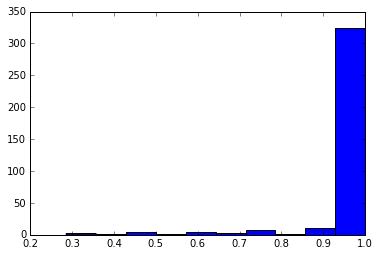

In [21]:
arr, eff = efficiency(recognized_tracks_yz, match_table)
print "efficiency:" + str(eff)
plt.hist(arr)

# UV_views in 1 & 2

efficiency:0.928154205607


(array([   1.,    0.,    5.,    3.,    6.,   28.,    1.,    0.,    4.,  153.]),
 array([ 0.3 ,  0.37,  0.44,  0.51,  0.58,  0.65,  0.72,  0.79,  0.86,
         0.93,  1.  ]),
 <a list of 10 Patch objects>)

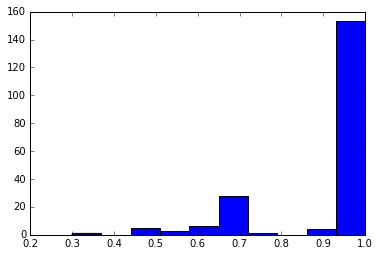

In [22]:
arr, eff = efficiency(recognized_tracks_xz, match_table)
print "efficiency:" + str(eff)
plt.hist(arr)

#creating of dicts of tracks for 3 & 4 stations

In [20]:
event_set = range(3, 1000)
index_yz = 1
index_xz = 1
recognized_tracks_yz = {}
recognized_tracks_xz = {}
for j in event_set:
    event = all_hits[all_hits['event'] == j]
    event_yz = modify_for_yz_analysis_3_4(event)
    tracks_yz, linking_table_yz = loop_yz(event_yz, 7, 0.85, 1)
    for i in linking_table_yz:
        recognized_tracks_yz[index_yz] = linking_table_yz[i]
        index_yz += 1
    event_xz = modify_for_xz_analysis_3_4(event)
    tracks_xz, linking_table_xz, Xs = loop_xz(event_xz, tracks_yz, linking_table_yz, 6, 15, 1)
    for i in linking_table_xz:
        recognized_tracks_xz[index_xz] = linking_table_xz[i]
        index_xz += 1

# Y_views in 3 & 4

efficiency:0.954810943744


(array([   2.,    2.,    4.,    1.,    5.,    3.,    7.,    2.,   10.,  325.]),
 array([ 0.28571429,  0.35714286,  0.42857143,  0.5       ,  0.57142857,
         0.64285714,  0.71428571,  0.78571429,  0.85714286,  0.92857143,  1.        ]),
 <a list of 10 Patch objects>)

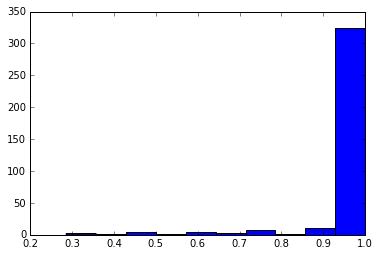

In [23]:
arr, eff = efficiency(recognized_tracks_yz, match_table)
print "efficiency:" + str(eff)
plt.hist(arr)

# UV_views in 3 & 4

efficiency:0.928154205607


(array([   1.,    0.,    5.,    3.,    6.,   28.,    1.,    0.,    4.,  153.]),
 array([ 0.3 ,  0.37,  0.44,  0.51,  0.58,  0.65,  0.72,  0.79,  0.86,
         0.93,  1.  ]),
 <a list of 10 Patch objects>)

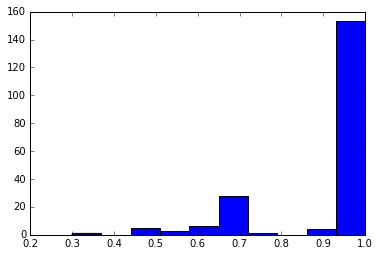

In [24]:
arr, eff = efficiency(recognized_tracks_xz, match_table)
print "efficiency:" + str(eff)
plt.hist(arr)